In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pymc3 as pm

In [10]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.5, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.3, 53.84, 53.16
])

In [11]:
data

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49, 51.86, 63.43, 53.  , 56.09, 51.93, 52.31, 52.33, 57.48,
       57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73,
       51.94, 54.95, 50.39, 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82,
       54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42,
       54.3 , 53.84, 53.16])

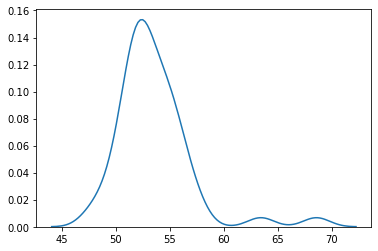

In [12]:
sns.kdeplot(data)

In [13]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

1.284631630798566

In [14]:
np.mean(stats.t(loc=0, scale=1, df=100).rvs(100))

-0.16081865551121372

In [15]:
x_values = np.linspace(-10, 10, 200)

(-7, 7)

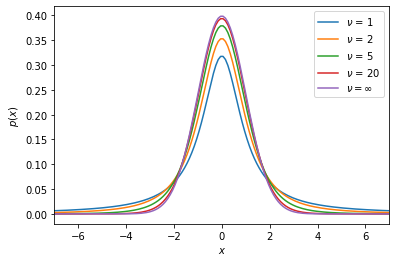

In [16]:
for df in [1,2,5,20]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=r'$\nu$ = {}'.format(df))
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu = \infty$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend(loc=0, fontsize=10)
plt.xlim(-7,7)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_100 draw iterations (2_000 + 2_200 draws total) took 2 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2210ac6a90>,
      dtype=object)

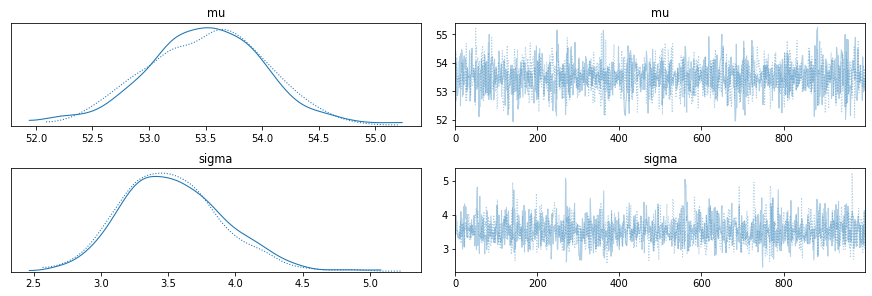

In [18]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 70)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    trace_g = pm.sample(1100)

chain_g = trace_g[100:]
pm.traceplot(chain_g)


In [19]:
df = pm.summary(chain_g)

In [20]:
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,53.507,0.535,52.495,54.521,0.012,0.009,1848.0,1848.0,1849.0,1222.0,1.0
sigma,3.538,0.380,2.888,4.261,0.009,0.007,1677.0,1576.0,1806.0,1233.0,1.0


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1618: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:335: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


ValueError: too many values to unpack (expected 2)

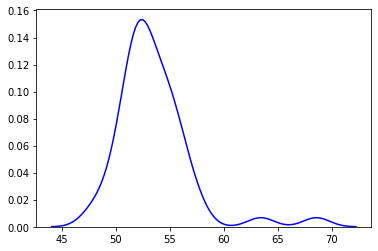

In [27]:
y_pred = pm.sample_posterior_predictive(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, color='r', alpha=0.1)
plt.xlim(35, 75)
plt.title("Gaussian Model", fontsize=16)
plt.xlabel('$x$', fontsize=16)


In [26]:
y_pred

{'y': array([[[60.63860459, 48.62667598, 43.46402739, ..., 51.64533952,
          49.6440451 , 50.88433806],
         [55.35126798, 50.70393314, 47.37744746, ..., 50.23608022,
          49.2292372 , 52.4476759 ],
         [55.37106616, 45.12859447, 52.60559614, ..., 58.11927645,
          52.21338236, 54.20122344],
         ...,
         [51.92233864, 52.52116184, 53.42426039, ..., 48.15061311,
          58.86257123, 48.05815207],
         [51.73978504, 55.4185193 , 49.16103647, ..., 53.70640272,
          55.54373592, 45.91193027],
         [57.96378901, 46.40627193, 50.19790515, ..., 46.48886114,
          51.74862649, 53.95273509]],
 
        [[50.69776744, 54.92268796, 47.63339848, ..., 44.17511766,
          48.1321057 , 48.09793952],
         [49.09908731, 47.57062898, 47.39888975, ..., 49.59162427,
          48.649772  , 52.9091493 ],
         [54.28958654, 52.01430597, 53.01529991, ..., 52.30227126,
          53.95139008, 47.32434707],
         ...,
         [51.99120456, 50.88

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [nu, sigma, mu]


Sampling 2 chains for 1_000 tune and 1_100 draw iterations (2_000 + 2_200 draws total) took 2 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f220786cc50>,
      dtype=object)

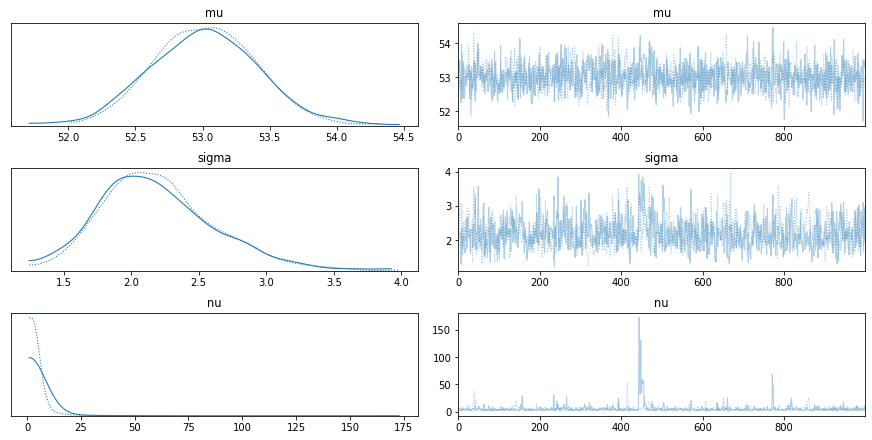

In [28]:
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40,75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu=mu, sigma=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100)

chain_t = trace_t[100:]
pm.traceplot(chain_t)


In [29]:
df = pm.summary(chain_t)
print(df)


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
mu     53.022  0.394  52.292   53.735      0.011    0.008    1277.0  1275.0   
sigma   2.202  0.424   1.452    2.998      0.017    0.013     587.0   550.0   
nu      5.247  7.450   1.197   10.644      0.463    0.327     259.0   259.0   

       ess_bulk  ess_tail  r_hat  
mu       1285.0    1280.0   1.00  
sigma     620.0     658.0   1.01  
nu        561.0     472.0   1.00  


In [30]:
y_pred = pm.sample_pos(chain_t, 100, model_t, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)


AttributeError: module 'pymc3' has no attribute 'sample_pos'